# Connectivity model: Hierarchical Clustering

As the name suggests, hierarchical clustering creates a hierarchy between the clusters. It does this by first assigning a cluster to every data point (for a dataset with size n, we get n clusters) and then the two nearest(most similar) clusters are merged together to form a new larger cluster. This merging of clusters continues iteratively until there is one whole cluster left. This way, the algorithm builds a hierarchy of clusters, thus hierarchical clustering.

There are two main types of hierarchical clustering:

- Agglomerative hierarchical clustering
- Divisive hierarchical clustering

## Agglomerative Hierarchical Clustering

In Agglomerative hierarchical clustering the clustering starts with a cluster for every data point. Then, the nearest (most similar) pair of clusters are merged together. This merging process is done iteratively until there is only one big cluster left.

<img src="figs/1_fR9xLqxlf6isxMLX4InwcQ.webp">

## Divisive Hierarchical Clustering

Divisive Hierarchical Clustering works the other way around. It starts with one cluster and assigns all the data points to that cluster. Afterwards, we split the farthest points in the cluster to seperate clusters. This splitting process is done iteratively until every cluster has one data point only.

<img src="figs/1_h-UBS2u21IrWjcN1ry9imw.webp">

In [1]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Checking the target names, the flowers are classified into three different classes: setosa, versicolor, virginica. Don’t get confused, we will not use the target names since we are dealing which clustering(unsupervised learning) here. This is just to give us a better understand of the dataset…

In [2]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
data = iris_data.data

## Dendrograms

Dendrograms are diagrams which are very helpful in visualising the hierarchical clustering structure. We can create a dendrogram to visualize the hierarchical clustering structure for the iris dataset:

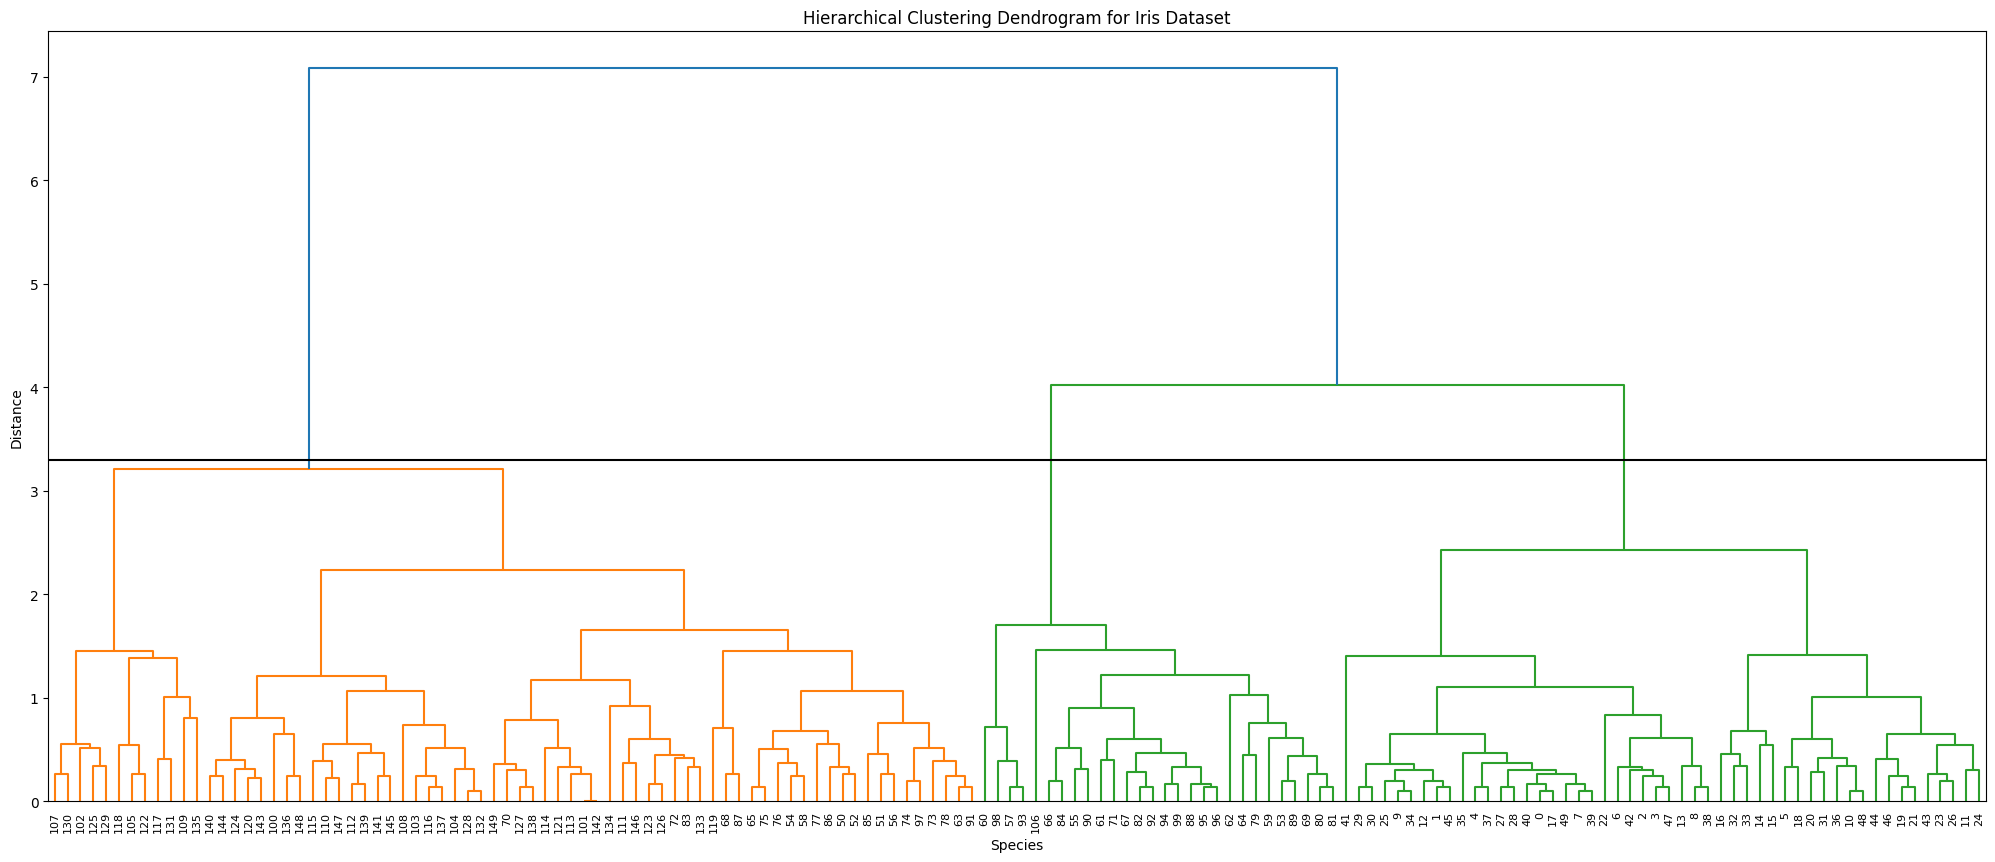

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
# generate the linkage matrix
Z = linkage(data, method='complete') #method as 'complete' is also known by the Farthest Point Algorithm
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram for Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(
         Z,
         #truncate_mode='lastp',  # show only the last p merged       clusters
         #p=150,                  #
         leaf_rotation=90.,      # rotates the x axis labels
         leaf_font_size=8.,      # font size for the x axis labels
         )
max_d = 3.3                # max_d as in max_distance
plt.axhline(y=max_d, c='k')
plt.show()

Flatten the hierarchical cluster that we have obtained from linkage using the fcluster (flat cluster) with our number of cluster selection equals to three. We can assign the cluster as a new column to the dataframe. But before that we need to convert our data to a dataframe…

In [5]:
clusters = fcluster(Z,3, criterion='maxclust')
print(clusters)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


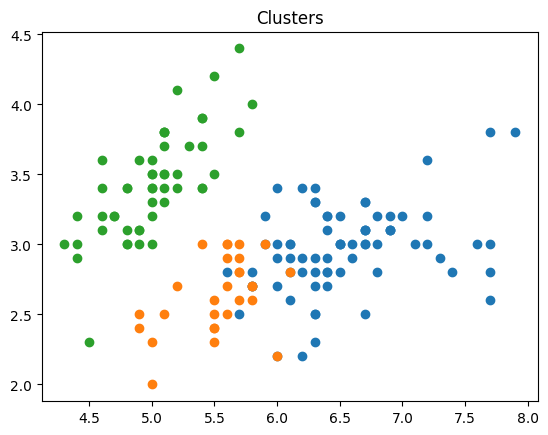

In [6]:
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], label = 'Type 1')
plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1], label = 'Type 2')
plt.scatter(data[clusters == 3, 0], data[clusters == 3, 1], label = 'Type 3')
plt.title('Clusters')
plt.show()

Now we know that three clusters would be a good decision for clustering the iris data. We can use the AgglomerativeClustering model with 3 clusters and compare the results to the target data we have. Since we use the same linkage method, we expect to get the same clustering results as the dendrogram

In [8]:
from sklearn.cluster import AgglomerativeClustering
classifier = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
clusters = classifier.fit_predict(data)

Using the clusters we have obtained from AgglomerativeClustering model, we can plot the first two features as a scatter plot and compare it to the scatter plot of the target data from the dataset.

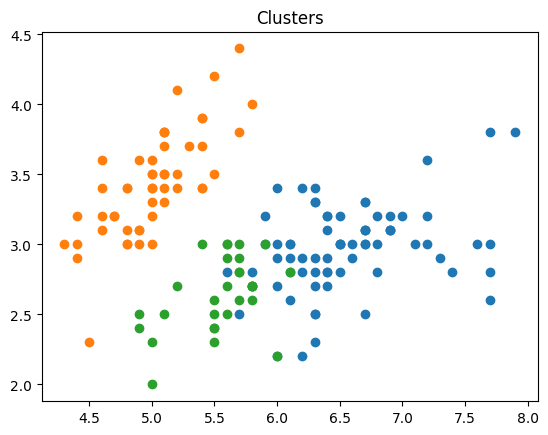

In [9]:
plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1], label = 'Type 1')
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], label = 'Type 2')
plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1], label = 'Type 3')
plt.title('Clusters')
plt.show()

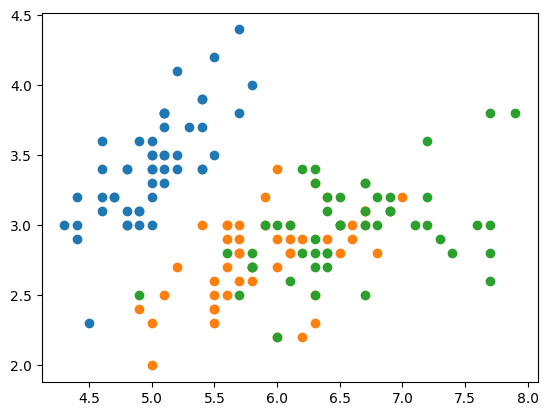

In [10]:
y=iris_data.target
plt.scatter(data[y == 0, 0], data[y == 0, 1], label = 'Type 1')
plt.scatter(data[y == 1, 0], data[y == 1, 1], label = 'Type 2')
plt.scatter(data[y == 2, 0], data[y == 2, 1], label = 'Type 3')

We have obtained a very similar clustering in comparison to the classification in the data except for a few data points. This way we were able to group similar species together using their features.

## References

[What is Clustering in Machine Learning](https://python.plainenglish.io/lets-talk-about-clustering-in-machine-learning-13a78ac025e3)